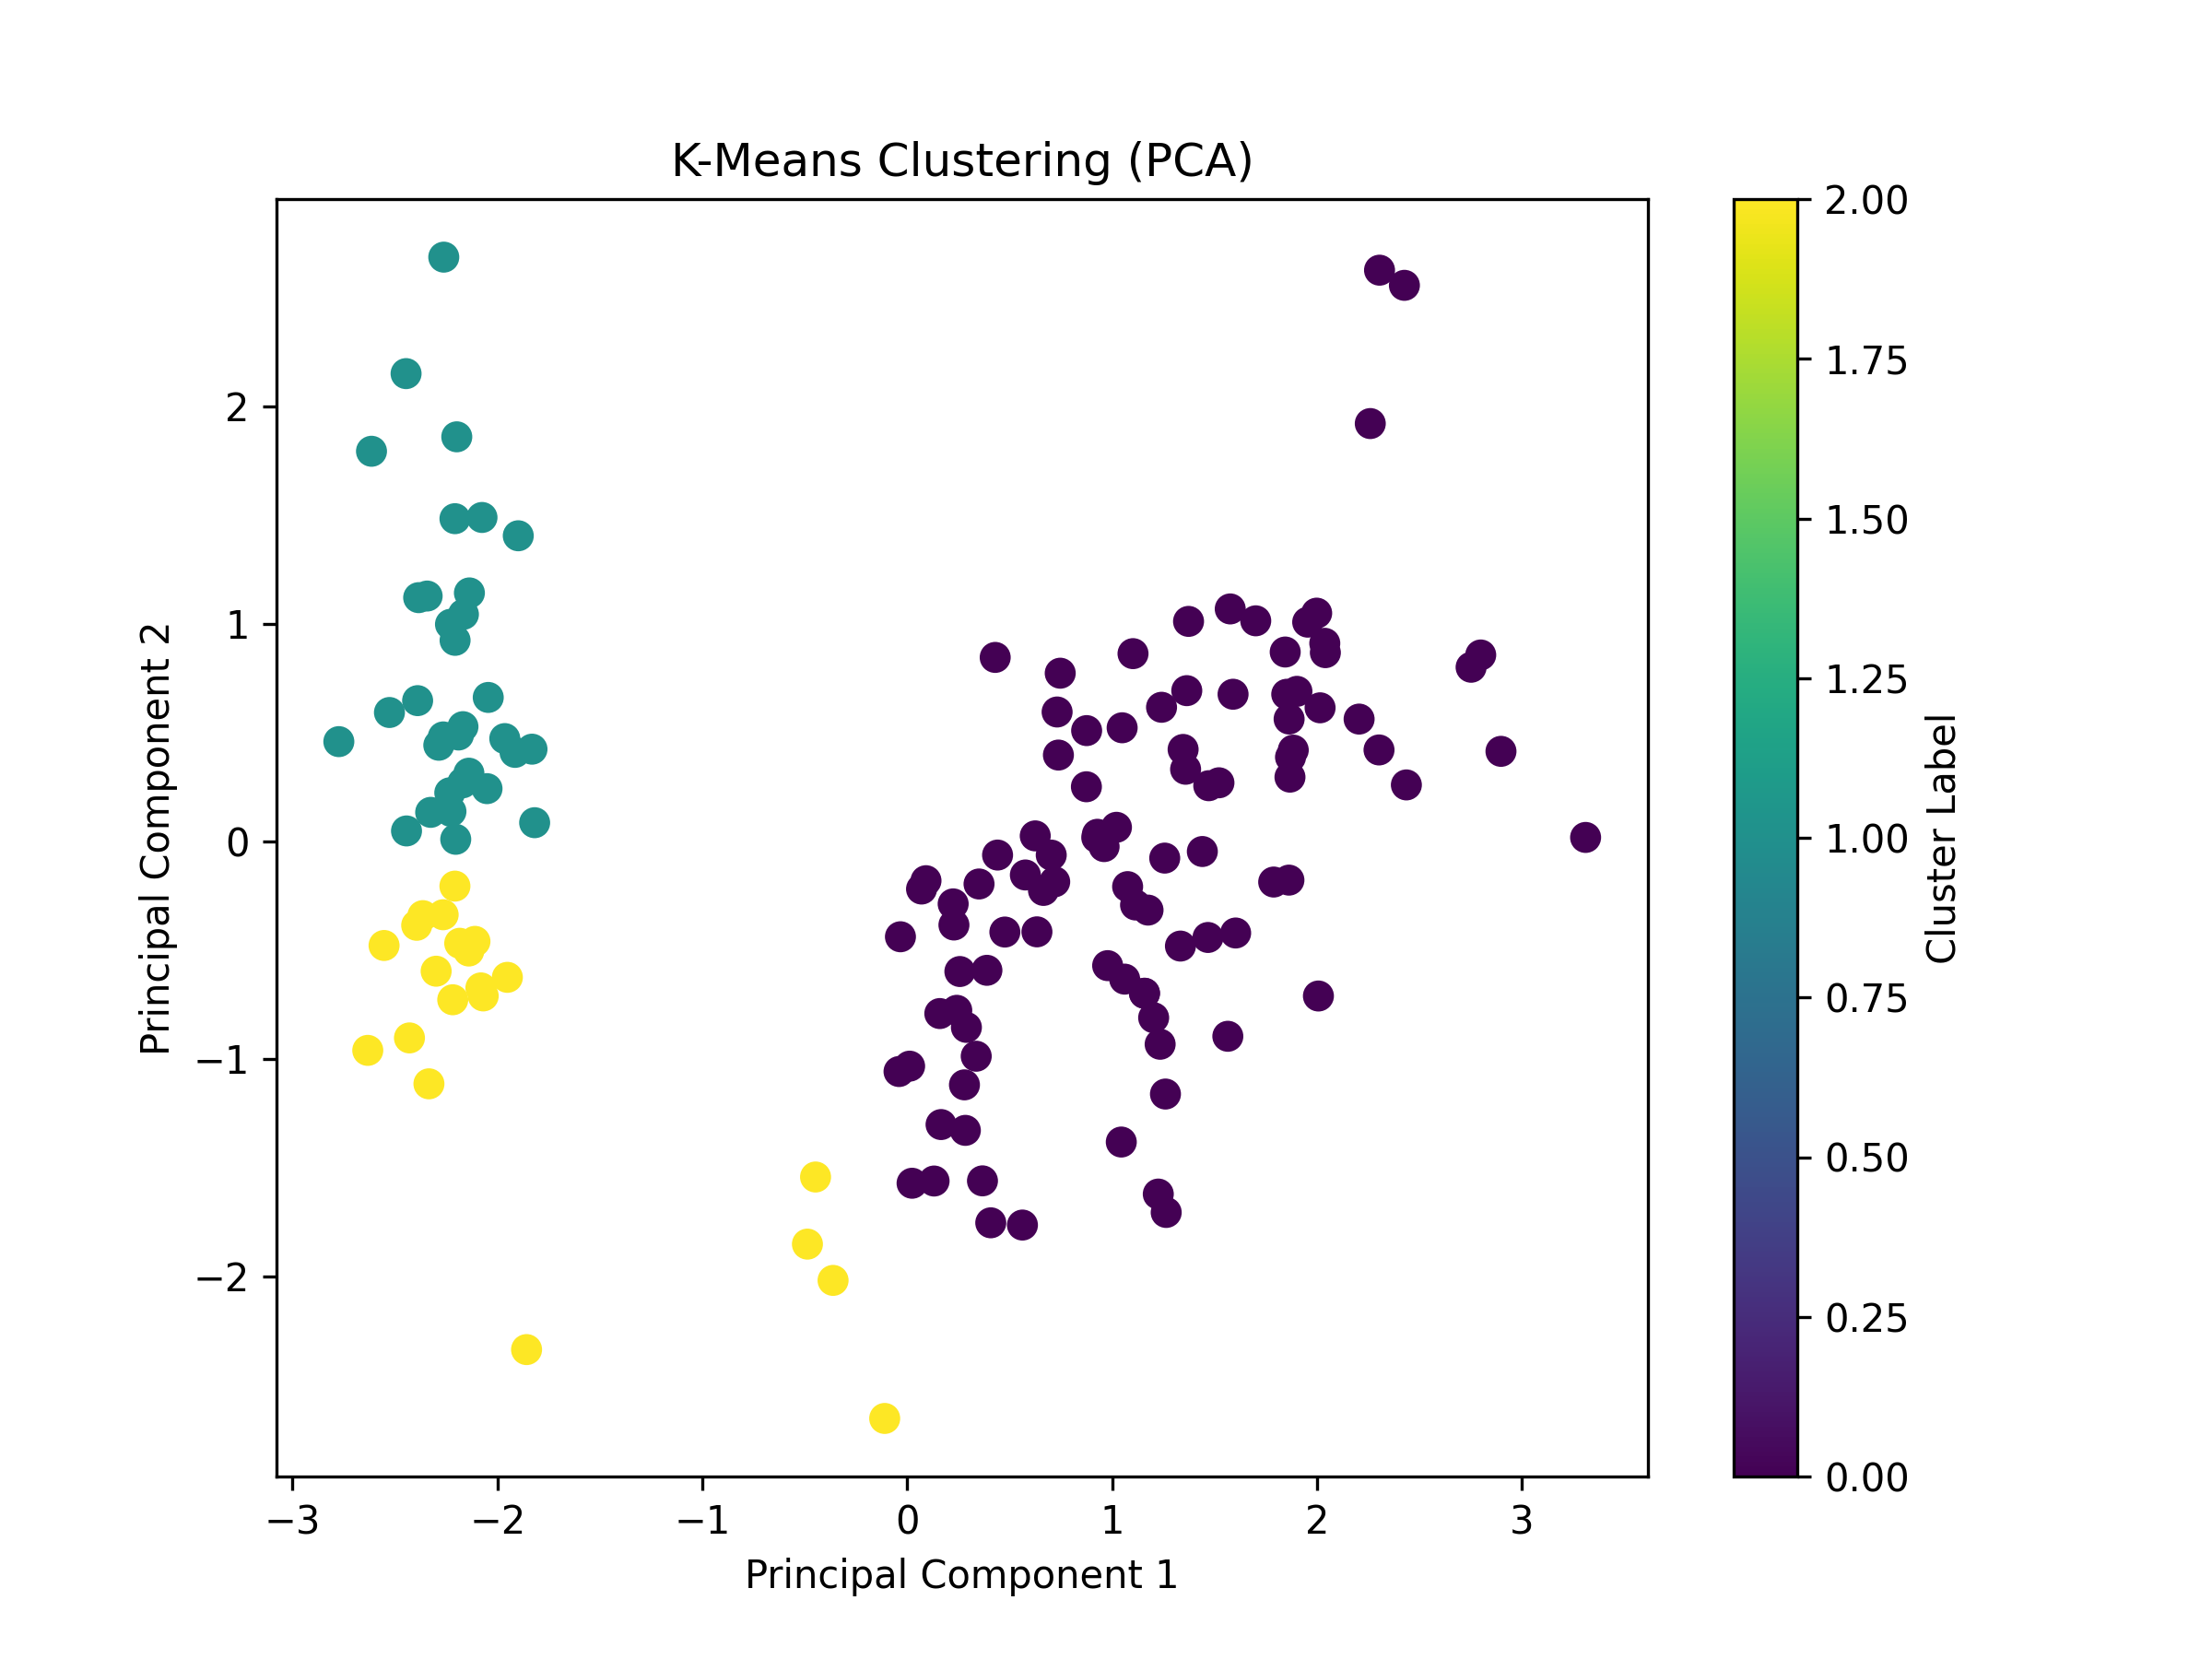

Cluster  True Label
0        1             46
         2             50
1        0             33
2        0             17
         1              4
dtype: int64


In [9]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import Image, display


# Data from flowers (sepal and petal length and width)
data = load_iris()  # Iris dataset: https://scikit-learn.org/1.5/datasets/toy_dataset.html#iris-dataset
X = pd.DataFrame(data.data, columns=data.feature_names)  # Matrix
T = pd.Series(data.target)  # True labels (not needed for clustering but useful for comparison)

# Standardization of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Labels
X['Cluster'] = clusters

# Principal Components Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('K-Means Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')

# Save
file_path = "KMeans_Clustering_PCA_Iris.png"
plt.savefig(file_path, dpi=300)
plt.close()
display(Image(filename="KMeans_Clustering_PCA_Iris.png"))

# Comparison for checking clustering outcomes against true labels
df = pd.DataFrame({'Cluster': clusters, 'True Label': T})
print(df.groupby(['Cluster', 'True Label']).size())
